# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import random

from scipy.stats import linregress

from config import api_key
from citipy import citipy

## Generate Cities List

In [38]:
#Create the lists to hold the data

cities_raw = []

#create random latitude and longitude values and combine them into a single DataFrame
#doing more than 500 because of duplicates (i tried doing 1500 and got a lot of dupes)
#tried pd.concat for lat_long and couldn't get it to work, found zip() and hope it works
lats = [random.randrange(-90,90) for i in range(2000)]
lngs = [random.randrange(-90,90) for i in range(2000)]
lat_lngs = zip(lats, lngs)
lat_lngs


for coord in lat_lngs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    cities_raw.append(city)

#need to remove the duplicate cities, I think I could have done this up front, but I was having trouble getting it to run
cities_unique = []
[cities_unique.append(x) for x in cities_raw if x not in cities_unique]

cities_unique


['illoqqortoormiut',
 'petropavlovka',
 'barentsburg',
 'east london',
 'beyneu',
 'muros',
 'pangnirtung',
 'shelburne',
 'lethem',
 'quatre cocos',
 'axim',
 'port elizabeth',
 'ushuaia',
 'busselton',
 'vila velha',
 'cape town',
 'luderitz',
 'ahar',
 'hobyo',
 'mehamn',
 'sudak',
 'kashi',
 'arraial do cabo',
 'korla',
 'nanortalik',
 'dikson',
 'keetmanshoop',
 'jamestown',
 'noormarkku',
 'chitral',
 'qaanaaq',
 'havoysund',
 'hithadhoo',
 'constantine',
 'narsaq',
 'chuy',
 'kargasok',
 'tchibanga',
 'cidreira',
 'saint george',
 'moundsville',
 'ilulissat',
 'tazovskiy',
 'maragogi',
 'punta arenas',
 'castro',
 'kruisfontein',
 'saint-augustin',
 'zhezkazgan',
 'vardo',
 'grand river south east',
 'harlingen',
 'koindu',
 'jega',
 'kambove',
 'berlevag',
 'ostrovnoy',
 'tessalit',
 'abu dhabi',
 'taolanaro',
 'port alfred',
 'mbandaka',
 'amderma',
 'mahebourg',
 'krasnoarmeysk',
 'cordoba',
 'torbay',
 'laguna',
 'olafsvik',
 'tabory',
 'najran',
 'bathsheba',
 'kokkola',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
#set my request stuff (taken from previous class activities)
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + api_key + "&units=" + units + "&q="

#set up my containers to add the data that it finds (if the city can be found)
city_builder = []
latitude = []
longitude = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

#thought it might be fun to see which cities it can't find, don't know if i'll do something with this or not
lonely_city = []

#OpenWeatherMap url + api key & modifications needed for call
for city in cities_unique:

    getter = f"{query_url}{city}"

    response=requests.get(getter).json()
    
    try:
        city_builder.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
    except:
        lonely_city.append({city})
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#create df
city_results_df = pd.DataFrame({'City': city_builder,
                       'Country': country,
                       'Lat': latitude,
                       'Lng': longitude,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
city_results_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Petropavlovka,RU,50.6114,105.3196,64.08,72,99,2.46,1627780398
1,East London,ZA,-33.0153,27.9116,66.97,24,97,6.22,1627780398
2,Beyneu,KZ,45.3167,55.2000,82.15,18,0,8.86,1627780398
3,Muros,ES,42.7762,-9.0603,61.23,90,81,3.09,1627780398
4,Pangnirtung,CA,66.1451,-65.7125,50.59,68,100,4.12,1627780276
...,...,...,...,...,...,...,...,...,...
664,Tiruchchendur,IN,8.4833,78.1167,80.89,69,100,5.55,1627780987
665,Dolores,AR,-36.3132,-57.6792,44.62,67,0,3.67,1627780987
666,Newark,US,40.7357,-74.1724,73.98,58,1,0.00,1627780945
667,Presidencia Roque Sáenz Peña,AR,-26.7852,-60.4388,55.74,56,82,2.10,1627780988


In [52]:
#export city results to CSV
output = "Outputs/city_results.csv"
city_results_df.to_csv(output, encoding="utf-8", index=False)

### This next part is just for fun to see how my random number generator picked diff geo locations

* I honestly have no idea why I'm doing this, I need to actual finish the homework first, but my curiosity is getting the better of me

In [118]:
#get a list of unique countries
countries_rep = []
[countries_rep.append(x) for x in city_results_df["Country"] if x not in countries_rep]

#get the open bank URL set up
#general url setup openbank_url + "RU" + "?format=json"
openbank_url = "http://api.worldbank.org/v2/country/"
url_ender = "?format=json"

#set up my lists to hold my response values
country_name = []
country_region = []
country_code = []
lonely_country = []

#run that loop de loop
for country in countries_rep:

    getter2 = f"{openbank_url}{country}{url_ender}"

    response=requests.get(getter2).json()
    
    try:
        country_code.append(response[1][0]["iso2Code"])
        country_name.append(response[1][0]["name"])
        country_region.append(response[1][0]["region"]["value"])
    except:
        lonely_country.append({country})
        pass

In [148]:
#create the data fram
country_df = pd.DataFrame({
    "Country Code":country_code,
    "Country Name":country_name,
    "World Region":country_region
})
country_df

region_df = pd.DataFrame(country_df["World Region"].value_counts())
region_df


,World Region
Sub-Saharan Africa,38
Europe & Central Asia,30
Latin America & Caribbean,23
Middle East & North Africa,14
East Asia & Pacific,7
South Asia,6
North America,2


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

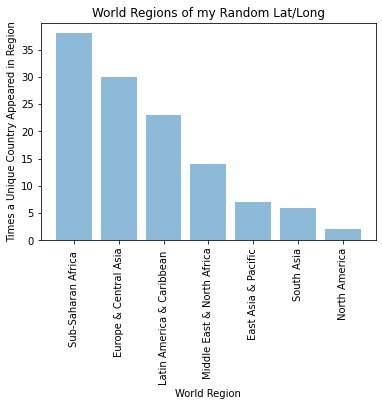

In [149]:
#Here is how many times each unique country aligned to a specific region of the world
plt.bar(region_df.index, region_df["World Region"], alpha=0.5, align="center")
plt.title("World Regions of my Random Lat/Long")
plt.xlabel("World Region")
plt.ylabel("Times a Unique Country Appeared in Region")
plt.xticks(rotation="90")

### Interesting results from running my data (unrelated to homework ask)

* In the data I found out of the 2,000 results I started with, I got 728 unique cities
* Of the 728 unique cities, I found 669 with a "nearby city" from citypy, 59 could not be found
* Of those 669 cities, all but 4 could generate a country code that pulled data from the world bank
* That data represented 120 unique countries in the dataset
* Of those 120 unique countries, nearly a third were in Sub-Saharan Africa and only 2 (2!) were in North America

### Back to the homework, plotting requirements
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

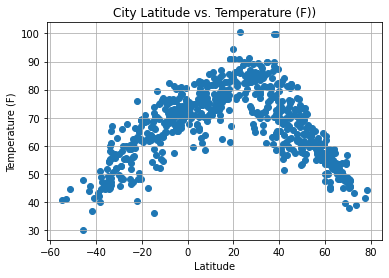

In [155]:
#Plotting Temp v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Max Temp']

plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Temperature (F))')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

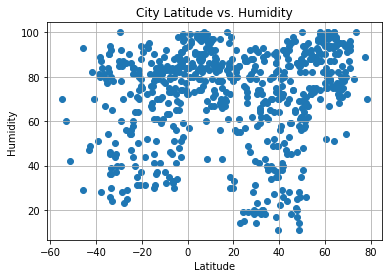

In [156]:
#Plotting Humidity v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Humidity']

plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

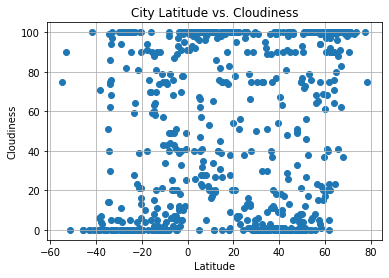

In [157]:
#Plotting cloudiness v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Cloudiness']

plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

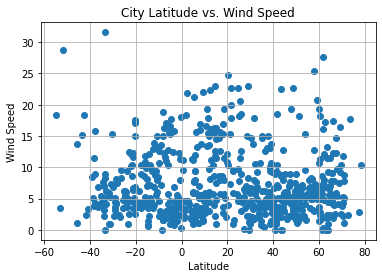

In [158]:
#Plotting wind speed v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Wind Speed']

plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

### Linear Regression Plotting Requirements
* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [163]:
#isolate my data into different hemispheres
northern = city_results_df.loc[city_df['Lat'] >= 0]
southern = city_results_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4883529499288833


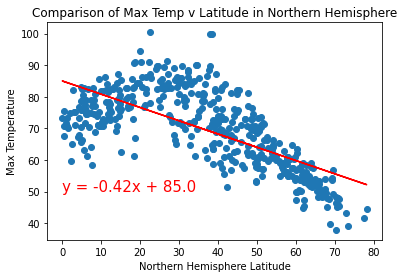

In [167]:

x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6520194839556251


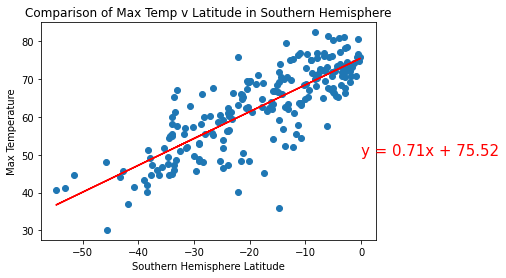

In [168]:

x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003333050431695863


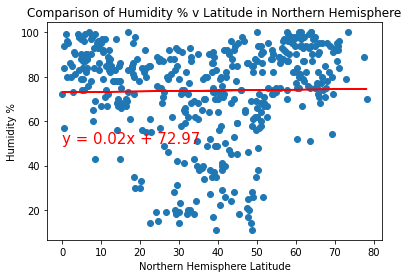

In [169]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03693970601748


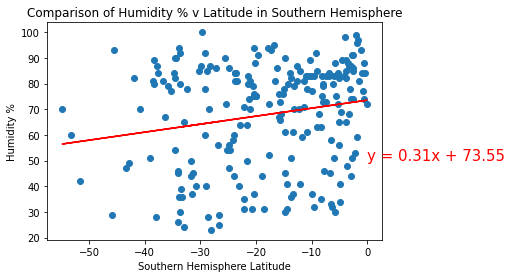

In [170]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00010416645947198878


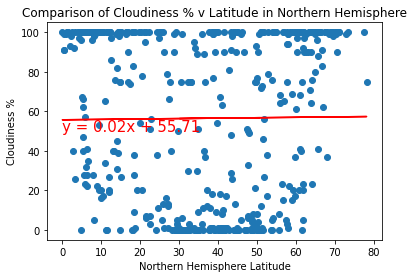

In [171]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016846839691042635


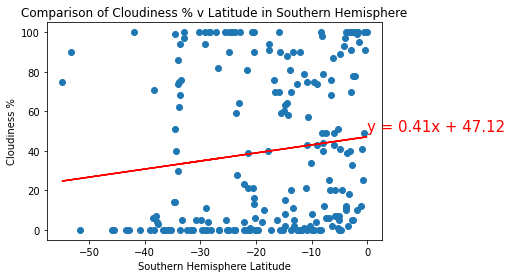

In [172]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009523247582581834


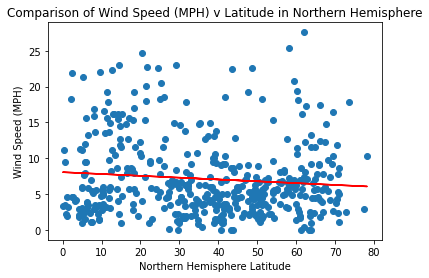

In [175]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013127337923985755


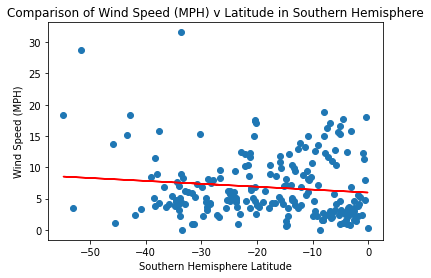

In [176]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()